# Jonathan Halverson
# Saturday, February 18, 2017
# Part 2: Overview of fight card data without joins to fighter data

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [64]:
fights = pd.read_csv('data/fightmetric_cards/fightmetric_fights.csv', header=0, parse_dates=['Date'])
fights.head(5)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,Location
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
3,Glover Teixeira,def.,Jared Cannonier,Light Heavyweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"
4,Dustin Poirier,def.,Jim Miller,Lightweight,M-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,"New York, New York, USA"


In [65]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4068 entries, 0 to 4067
Data columns (total 11 columns):
Winner         4068 non-null object
Outcome        4068 non-null object
Loser          4068 non-null object
WeightClass    4068 non-null object
Method         4068 non-null object
MethodNotes    2159 non-null object
Round          4068 non-null int64
Time           4068 non-null object
Event          4068 non-null object
Date           4068 non-null datetime64[ns]
Location       4068 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 349.7+ KB


### How many UFC fights have there been?

In [66]:
fights.shape[0]

4068

### Let's rename the duplicate names:

In [67]:
cols = ['Winner', 'Outcome', 'Loser', 'WeightClass']
name = 'Michael McDonald'
fights[(fights.Winner == name) | (fights.Loser == name)][cols]

,Winner,Outcome,Loser,WeightClass
292,John Lineker,def.,Michael McDonald,Bantamweight
532,Michael McDonald,def.,Masanori Kanehara,Bantamweight
1527,Urijah Faber,def.,Michael McDonald,Bantamweight
1683,Michael McDonald,def.,Brad Pickett,Bantamweight
1856,Renan Barao,def.,Michael McDonald,Bantamweight
2148,Michael McDonald,def.,Miguel Torres,Bantamweight
2280,Michael McDonald,def.,Alex Soto,Bantamweight
2448,Michael McDonald,def.,Chris Cariaso,Bantamweight
2469,Michael McDonald,def.,Edwin Figueroa,Bantamweight


We see that the second Michael Donald has not fought in the UFC.

In [68]:
name = 'Dong Hyun Kim'
fights[fights.Winner.str.contains(name) | fights.Loser.str.contains(name)][cols]

,Winner,Outcome,Loser,WeightClass
49,Dong Hyun Kim,def.,Tarec Saffiedine,Welterweight
101,Dong Hyun Kim,def.,Brendan O'Reilly,Lightweight
365,Polo Reyes,def.,Dong Hyun Kim,Lightweight
587,Dong Hyun Kim,def.,Dominic Waters,Welterweight
596,Dominique Steele,def.,Dong Hyun Kim,Welterweight
836,Dong Hyun Kim,def.,Joshua Burkman,Welterweight
1199,Tyron Woodley,def.,Dong Hyun Kim,Welterweight
1439,Dong Hyun Kim,def.,John Hathaway,Welterweight
1620,Dong Hyun Kim,def.,Erick Silva,Welterweight
1838,Dong Hyun Kim,def.,Siyar Bahadurzada,Welterweight


In [69]:
idx1 = fights[(fights.Winner == name) & (fights.Loser == 'Brendan O\'Reilly')].index.values
idx2 = fights[(fights.Winner == 'Polo Reyes') & (fights.Loser == name)].index.values
idx3 = fights[(fights.Winner == 'Dominique Steele') & (fights.Loser == name)].index.values
fights = fights.set_value(idx1, 'Winner', name + ' 2')
fights = fights.set_value(idx2, 'Loser', name + ' 2')
fights = fights.set_value(idx3, 'Loser', name + ' 2')

In [70]:
fights[fights.Winner.str.contains(name) | fights.Loser.str.contains(name)][cols]

,Winner,Outcome,Loser,WeightClass
49,Dong Hyun Kim,def.,Tarec Saffiedine,Welterweight
101,Dong Hyun Kim 2,def.,Brendan O'Reilly,Lightweight
365,Polo Reyes,def.,Dong Hyun Kim 2,Lightweight
587,Dong Hyun Kim,def.,Dominic Waters,Welterweight
596,Dominique Steele,def.,Dong Hyun Kim 2,Welterweight
836,Dong Hyun Kim,def.,Joshua Burkman,Welterweight
1199,Tyron Woodley,def.,Dong Hyun Kim,Welterweight
1439,Dong Hyun Kim,def.,John Hathaway,Welterweight
1620,Dong Hyun Kim,def.,Erick Silva,Welterweight
1838,Dong Hyun Kim,def.,Siyar Bahadurzada,Welterweight


In [71]:
name = 'Tony Johnson'
fights[fights.Winner.str.contains(name) | fights.Loser.str.contains(name)][cols]

,Winner,Outcome,Loser,WeightClass


We see that Tony Johnson has never fought in the UFC.

### How many different fighters have fought in the UFC?

In [72]:
win_lose = fights.Winner.append(fights.Loser, ignore_index=True)
win_lose.drop_duplicates().size

1641

### What are the different weight classes and their counts?

In [73]:
fights.WeightClass.value_counts()

Lightweight              827
Welterweight             789
Middleweight             621
Heavyweight              426
Light Heavyweight        402
Featherweight            320
Bantamweight             261
Flyweight                131
Open Weight              125
Women's Bantamweight      76
Women's Strawweight       68
Catch Weight              19
Women's Featherweight      1
Women's Flyweight          1
Super Heavyweight          1
Name: WeightClass, dtype: int64

### Who has the most UFC fights?

In [74]:
win_lose.value_counts().head(25)

Tito Ortiz         27
Michael Bisping    27
Frank Mir          27
Jim Miller         26
Gleison Tibau      26
Matt Hughes        25
Diego Sanchez      25
Josh Koscheck      25
Demian Maia        24
Donald Cerrone     24
Jeremy Stephens    24
BJ Penn            24
Randy Couture      24
Matt Brown         23
Clay Guida         23
Vitor Belfort      23
Nate Diaz          23
Chuck Liddell      23
Joe Lauzon         23
Nate Marquardt     23
Ross Pearson       22
Gabriel Gonzaga    22
Andrei Arlovski    22
Chris Leben        22
Melvin Guillard    22
dtype: int64

### Any names with non-alphabetical characters?

In [75]:
win_lose[~win_lose.apply(lambda x: ''.join(x.split()).isalpha())].drop_duplicates().sort_values()

231         Ashlee Evans-Smith
863           Brendan O'Reilly
6501              Chuck O'Neil
101            Dong Hyun Kim 2
1558         Georges St-Pierre
8085             He-Man Gipson
1876        Isaac Vallie-Flagg
2998              Jake O'Brien
4110    Jocelyn Jones-Lybarger
21         Khalil Rountree Jr.
6789          Mostapha Al-Turk
1855          Nah-Shon Burrell
75       Olivier Aubin-Mercier
6914           Razak Al-Hassan
4919         Roldan Sangcha-an
855             Sean O'Connell
6449                TJ O'Brien
6996        Xavier Foupa-Pokam
dtype: object

### Are there names from the FightMetric fight cards not in the FightMetric fighter database?

In [76]:
fighters = pd.read_csv('data/fightmetric_fighters/fightmetric_fighters_CLEAN_3-6-2017.csv', header=0)
fighters.head(5)

,Name,Nickname,Dob,Age,Weight,Height,Reach,Stance,Win,Loss,Draw
0,Tom Aaron,NaN,1978-07-13,38.6,155.0,NaN,NaN,NaN,5.0,3.0,0.0
1,Danny Abbadi,The Assassin,1983-07-03,33.7,155.0,71.0,NaN,Orthodox,4.0,6.0,0.0
2,David Abbott,Tank,NaN,NaN,265.0,72.0,NaN,Switch,10.0,14.0,0.0
3,Shamil Abdurakhimov,Abrek,1981-09-02,35.5,235.0,75.0,76.0,Orthodox,16.0,4.0,0.0
4,Hiroyuki Abe,Abe Ani,NaN,NaN,145.0,66.0,NaN,Orthodox,8.0,14.0,3.0


In [77]:
set(win_lose) - set(fighters.Name)

set()

We see all fighters on the fight cards are found in the database.

### What are the possible fight outcomes and their count?

In [78]:
fights.Outcome.value_counts()

def.          3999
no contest      42
draw            27
Name: Outcome, dtype: int64

In [79]:
fights.Method.value_counts()

KO/TKO        1384
U-DEC         1329
SUB            888
S-DEC          368
M-DEC           43
Overturned      30
CNC             12
DQ              12
Other            2
Name: Method, dtype: int64

### What are all the fights that resulted in a draw?

In [80]:
fights[fights.Outcome == 'draw'][['Winner', 'Loser', 'Event', 'Location', 'Date']]

,Winner,Loser,Event,Location,Date
144,Tyron Woodley,Stephen Thompson,UFC 205: Alvarez vs McGregor,"New York, New York, USA",2016-11-12
214,Alejandro Perez,Albert Morales,UFC Fight Night: Poirier vs. Johnson,"Hidalgo, Texas, USA",2016-09-17
233,Jarjis Danho,Christian Colombo,UFC Fight Night: Arlovski vs. Barnett,"Hamburg, Hamburg, Germany",2016-09-03
279,Michael Graves,Bojan Velickovic,UFC 201: Lawler vs. Woodley,"Atlanta, Georgia, USA",2016-07-30
364,Kevin Casey,Elvis Mutapcic,UFC 199: Rockhold vs. Bisping 2,"Los Angeles, California, USA",2016-06-04
388,Sergio Moraes,Luan Chagas,UFC 198: Werdum vs Miocic,"Curitiba, Parana, Brazil",2016-05-14
512,Damon Jackson,Levan Makashvili,UFC Fight Night: Johnson vs. Bader,"Newark, New Jersey, USA",2016-01-30
638,Nicolas Dalby,Darren Till,UFC Fight Night: Holohan vs Smolka,"Dublin, Leinster, Ireland",2015-10-24
663,Mizuto Hirota,Teruto Ishihara,UFC Fight Night: Barnett vs Nelson,"Saitama, Japan",2015-09-26
1408,Leonardo Santos,Norman Parke,UFC Fight Night: Shogun vs Henderson,"Natal, Rio Grande do Norte, Brazil",2014-03-23


### What are all the wins by disqualification?

In [81]:
fights[fights.Method == 'DQ'][['Winner', 'Outcome', 'Loser', 'Method', 'Event', 'Location', 'Date']]

,Winner,Outcome,Loser,Method,Event,Location,Date
629,Abel Trujillo,def.,Gleison Tibau,DQ,UFC Fight Night: Belfort vs Henderson,"Sao Paulo, Brazil",2015-11-07
677,Joe Riggs,def.,Ron Stallings,DQ,UFC 191: Johnson vs Dodson 2,"Las Vegas, Nevada, USA",2015-09-05
1507,Kiichi Kunimoto,def.,Luiz Dutra,DQ,UFC Fight Night: Saffiedine vs Lim,"Singapore, Singapore",2014-01-04
1553,Akira Corassani,def.,Maximo Blanco,DQ,The Ultimate Fighter 18 Finale,"Las Vegas, Nevada, USA",2013-11-30
1950,Patrick Cote,def.,Alessio Sakara,DQ,UFC 154: St-Pierre vs Condit,"Montreal, Quebec, Canada",2012-11-17
2235,Carlo Prater,def.,Erick Silva,DQ,UFC 142: Aldo vs Mendes,"Rio de Janeiro, Brazil",2012-01-14
2742,Matthew Riddle,def.,Greg Soto,DQ,UFC 111: St-Pierre vs Hardy,"Newark, New Jersey, USA",2010-03-27
2807,Matt Hamill,def.,Jon Jones,DQ,The Ultimate Fighter: Heavyweights Finale,"Las Vegas, Nevada, USA",2009-12-05
3216,James Irvin,def.,Luiz Cane,DQ,UFC 79: Nemesis,"Las Vegas, Nevada, USA",2007-12-29
3680,Frank Mir,def.,Wes Sims,DQ,UFC 43: Meltdown,"Las Vegas, Nevada, USA",2003-06-06


### What are all the no contest fights?

In [82]:
fights[fights.Method == 'CNC'][['Winner', 'Outcome', 'Loser', 'Event', 'Date']]

,Winner,Outcome,Loser,Event,Date
55,Alex Oliveira,no contest,Tim Means,UFC 207: Nunes vs. Rousey,2016-12-30
548,Cole Miller,no contest,Jim Alers,UFC on FOX: Dos Anjos vs. Cowboy 2,2015-12-19
580,Antonio Carlos Junior,no contest,Kevin Casey,UFC Fight Night: Namajunas vs. VanZant,2015-12-10
940,Roman Salazar,no contest,Norifumi Yamamoto,UFC 184: Rousey vs Zingano,2015-02-28
1038,KJ Noons,no contest,Daron Cruickshank,The Ultimate Fighter 20 Finale,2014-12-12
1405,Rani Yahya,no contest,Johnny Bedford,UFC Fight Night: Minotauro vs Nelson,2014-04-11
1595,Ross Pearson,no contest,Melvin Guillard,UFC Fight Night: Machida vs Munoz,2013-10-26
1676,Roger Bowling,no contest,Abel Trujillo,UFC Fight Night: Condit vs Kampmann 2,2013-08-28
1898,Iuri Alcantara,no contest,Pedro Nobre,UFC on FX: Belfort vs Bisping,2013-01-19
2026,Phil Davis,no contest,Wagner Prado,UFC on FOX: Shogun vs Vera,2012-08-04


### What are all the fights that were overtuned to a no contest?

In [83]:
fights[fights.Method == 'Overturned'][['Winner', 'Outcome', 'Loser', 'Event', 'Location', 'Date']]

,Winner,Outcome,Loser,Event,Location,Date
129,Francimar Barroso,no contest,Darren Stewart,UFC Fight Night: Bader vs. Nogueira,"Sao Paulo, Brazil",2016-11-19
305,Brock Lesnar,no contest,Mark Hunt,UFC 200: Tate vs Nunes,"Las Vegas, Nevada, USA",2016-07-09
824,Rony Jason,no contest,Damon Jackson,UFC Fight Night: Condit vs Alves,"Goiania, Goias, Brazil",2015-05-30
918,Leandro Silva,no contest,Drew Dober,UFC Fight Night: Maia vs LaFlare,"Rio de Janeiro, Brazil",2015-03-21
966,Anderson Silva,no contest,Nick Diaz,UFC 183: Silva vs Diaz,"Las Vegas, Nevada, USA",2015-01-31
1005,Hector Lombard,no contest,Joshua Burkman,UFC 182: Jones vs Cormier,"Las Vegas, Nevada, USA",2015-01-03
1124,Pedro Munhoz,no contest,Jerrod Sanders,UFC Fight Night: MacDonald vs Saffiedine,"Halifax, Nova Scotia, Canada",2014-10-04
1225,Mike de la Torre,no contest,Brian Ortega,UFC on Fox: Lawler vs Brown,"San Jose, California, USA",2014-07-26
1261,Robert Drysdale,no contest,Keith Berish,The Ultimate Fighter 19 Finale,"Las Vegas, Nevada, USA",2014-07-06
1271,Kevin Casey,no contest,Bubba Bush,UFC 175: Weidman vs Machida,"Las Vegas, Nevada, USA",2014-07-05


### Data is clean so write to CSV

In [84]:
today = pd.to_datetime('today').to_pydatetime()
date = '-'.join(map(str, [today.month, today.day, today.year]))
fights.to_csv('data/fightmetric_cards/fightmetric_fights_CLEAN_' + str(date) + '.csv', index=False)

### What is the distribution of outcomes by year?

In [85]:
ko = fights[fights.Method.str.contains('KO')].Date.dt.year.value_counts()
sub = fights[fights.Method.str.contains('SUB')].Date.dt.year.value_counts()
dec = fights[fights.Method.str.contains('DEC')].Date.dt.year.value_counts()
other = fights[~fights.Method.str.contains('KO|SUB|DEC')].Date.dt.year.value_counts()

In [86]:
outcome_by_year = pd.DataFrame([ko, sub, dec, other]).T.fillna(0)
outcome_by_year.columns = ['KO/TKO', 'SUB', 'DEC', 'Other']
outcome_by_year['Total'] = outcome_by_year.sum(axis=1)
outcome_by_year

,KO/TKO,SUB,DEC,Other,Total
1993,3.0,5.0,0.0,0.0,8.0
1994,11.0,20.0,0.0,0.0,31.0
1995,15.0,20.0,3.0,2.0,40.0
1996,27.0,11.0,5.0,0.0,43.0
1997,13.0,19.0,8.0,1.0,41.0
1998,9.0,8.0,8.0,0.0,25.0
1999,26.0,7.0,11.0,0.0,44.0
2000,14.0,11.0,17.0,1.0,43.0
2001,17.0,9.0,12.0,2.0,40.0
2002,29.0,8.0,15.0,1.0,53.0


In [87]:
outcome_by_year.sum()

KO/TKO    1384.0
SUB        888.0
DEC       1740.0
Other       56.0
Total     4068.0
dtype: float64

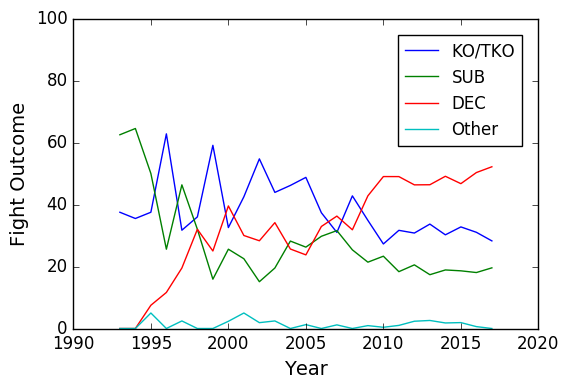

In [88]:
plt.plot(outcome_by_year.index, 100 * outcome_by_year['KO/TKO'] / outcome_by_year.Total, label='KO/TKO')
plt.plot(outcome_by_year.index, 100 * outcome_by_year['SUB'] / outcome_by_year.Total, label='SUB')
plt.plot(outcome_by_year.index, 100 * outcome_by_year['DEC'] / outcome_by_year.Total, label='DEC')
plt.plot(outcome_by_year.index, 100 * outcome_by_year['Other'] / outcome_by_year.Total, label='Other')
plt.xlabel('Year')
plt.ylabel('Fight Outcome')
plt.legend(fontsize=12)
plt.ylim(0, 100)
plt.savefig('report/fight_outcome_breakdown.pdf')

Since about 2010 about 50% of fights end in decision, 30% by KO/TKO and 20% by submission.

### How many UFC events have there been each year?

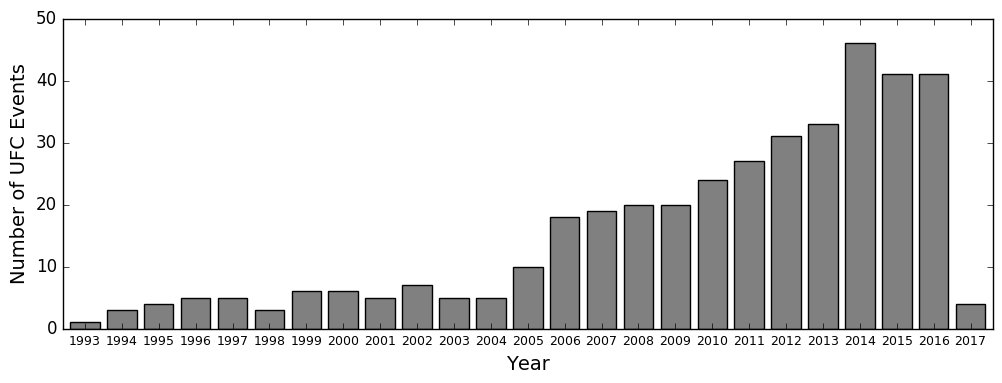

In [89]:
events_per_year = fights.groupby('Event').head(1).Date.dt.year.value_counts().sort_index()
fig, ax = plt.subplots(1, figsize=(12, 4))
plt.bar(range(events_per_year.size), events_per_year.values, tick_label=events_per_year.index, align='center', color='gray')
for label in ax.get_xticklabels():
     label.set_fontsize(9)
plt.xlabel('Year')
plt.ylabel('Number of UFC Events')
plt.xlim(-0.6, 24.6)
plt.savefig('report/number_of_events.pdf')

In [90]:
events_per_year

1993     1
1994     3
1995     4
1996     5
1997     5
1998     3
1999     6
2000     6
2001     5
2002     7
2003     5
2004     5
2005    10
2006    18
2007    19
2008    20
2009    20
2010    24
2011    27
2012    31
2013    33
2014    46
2015    41
2016    41
2017     4
Name: Date, dtype: int64

In [97]:
top15 = fights.groupby('Event').head(1).Location.value_counts().to_frame().reset_index().head(15)
top15.index = range(1, 16)
top15.columns = ['Location', 'Number of Events']
top15.to_latex('report/top_locations_RAW.tex', index=True)

### Where have the UFC events been held?

In [93]:
fights[fights.Location.str.contains('Brazil')].groupby('Event').head(1).Location.value_counts().sort_values(ascending=False)[:125]

Sao Paulo, Brazil                          7
Rio de Janeiro, Brazil                     6
Jaragua do Sul, Santa Catarina, Brazil     2
Brasilia, Distrito Federal, Brazil         2
Belo Horizonte, Minas Gerais, Brazil       2
Goiania, Goias, Brazil                     2
Curitiba, Parana, Brazil                   1
Natal, Rio Grande do Norte, Brazil         1
Uberlandia, Minas Gerais, Brazil           1
Porto Alegre, Rio Grande do Sul, Brazil    1
Fortaleza, Ceara, Brazil                   1
Rio de Janeiro, Rio de Janeiro, Brazil     1
Name: Location, dtype: int64

### Below we construct a map showing the locations of the UFC events:

In [30]:
iofile = 'data/event_longitude_latitude.dat'
if 0:
     from geopy.geocoders import Nominatim
     geolocator = Nominatim()
     coord_x = []
     coord_y = []
     locations = fights.Location.unique()
     for location in locations:
          if location == 'Mexico City, Distrito Federal, Mexico':
               location = 'Mexico City, Mexico'
          if location == 'Curitiba, Parana, Brazil':
               location = 'Curitiba, Brazil'
          coords = geolocator.geocode(location, timeout=30)
          if coords:
               coord_x.append(coords.longitude)
               coord_y.append(coords.latitude)
          else:
               print 'Could not find coordinates:', location
     with open(iofile, 'w') as f:
          for location, x, y in zip(locations, coord_x, coord_y):
               f.write('%s|%g|%g\n' % (location, x, y))
else:
     import csv
     locations = []
     with open(iofile, 'r') as csvfile:
          spamreader = csv.reader(csvfile, delimiter='|')
          for row in spamreader:
               locations.append([row[0], float(row[1]), float(row[2])])
     df = pd.DataFrame(locations, columns=['location', 'x', 'y'])
     us = df[df.location.str.contains('USA')]

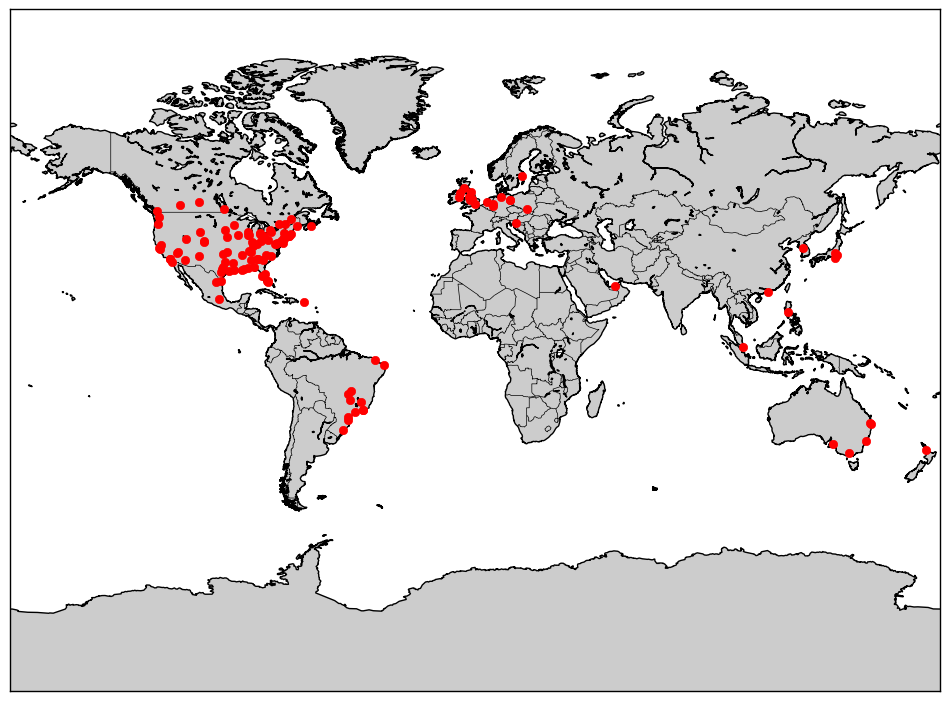

In [31]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(1, figsize=(12, 10))
m = Basemap(projection='mill', resolution='l')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents()
#m.drawparallels(np.arange(-90,90,20), labels=[1,1,0,1], linewidth=0)
#m.drawmeridians(np.arange(-180,180,30), labels=[1,1,0,1], linewidth=0)
x, y = m(df.x.values, df.y.values)
m.plot(x, y, 'ro', markersize=6, mec='r')
fig.savefig('report/world_map.pdf', bbox_inches='tight')

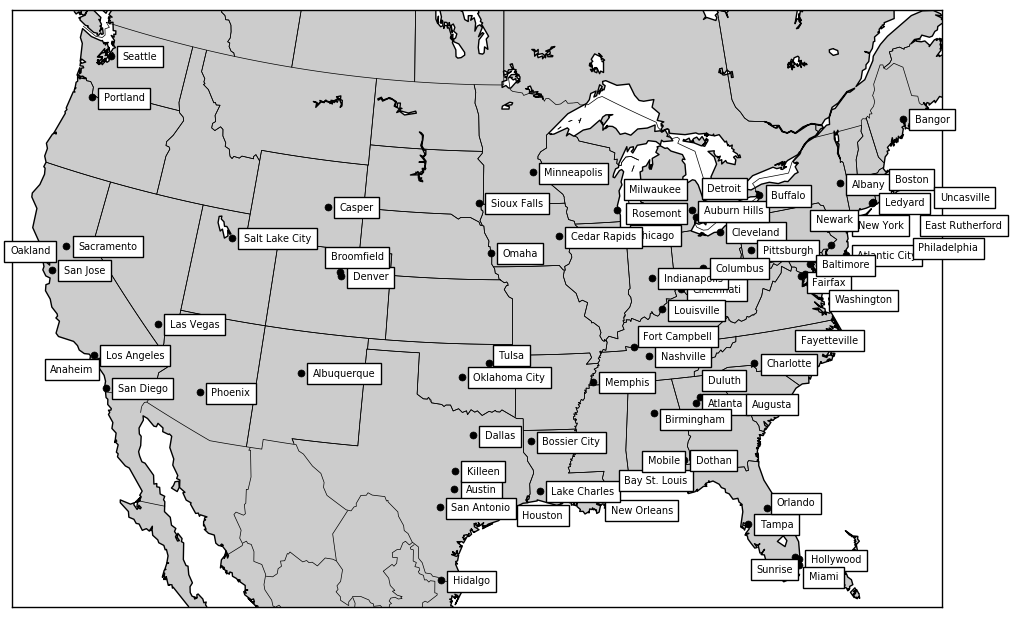

In [32]:
fig = plt.figure(1, figsize=(12, 12))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,resolution='l', projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.fillcontinents()

x, y = m(us.x.values, us.y.values)
m.plot(x, y, 'ko', markersize=5)
labels = [loc.split(',')[0] for loc in us.location]
for label, xpt, ypt in zip(labels, x, y):
     if (label == 'Oakland'):
          plt.text(xpt - 200000, ypt + 20000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Anaheim'):
          plt.text(xpt - 250000, ypt - 60000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Broomfield'):
          plt.text(xpt - 50000, ypt + 60000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Houston'):
          plt.text(xpt + 120000, ypt - 90000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Tulsa'):
          plt.text(xpt + 50000, ypt + 20000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Fort Campbell'):
          plt.text(xpt + 50000, ypt + 40000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Detroit'):
          plt.text(xpt + 60000, ypt + 130000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Mobile'):
          plt.text(xpt + 60000, ypt + 60000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Bay St. Louis'):
          plt.text(xpt + 60000, ypt + 10000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'New Orleans'):
          plt.text(xpt + 60000, ypt - 100000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Miami'):
          plt.text(xpt + 50000, ypt - 80000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Orlando'):
          plt.text(xpt + 50000, ypt + 10000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Sunrise'):
          plt.text(xpt - 200000, ypt - 80000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Fayetteville'):
          plt.text(xpt + 60000, ypt + 90000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Birmingham'):
          plt.text(xpt + 60000, ypt - 50000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Duluth'):
          plt.text(xpt + 40000, ypt + 70000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Washington'):
          plt.text(xpt + 150000, ypt - 150000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Philadelphia'):
          plt.text(xpt + 450000, ypt - 30000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'East Rutherford'):
          plt.text(xpt + 400000, ypt - 30000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Newark'):
          plt.text(xpt - 140000, ypt + 10000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Uncasville'):
          plt.text(xpt + 350000, ypt + 10000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Fairfax'):
          plt.text(xpt + 60000, ypt - 50000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Milwaukee'):
          plt.text(xpt + 60000, ypt + 90000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Rosemont'):
          plt.text(xpt + 60000, ypt + 80000, label, fontsize=7, bbox=dict(facecolor='white'))
     else:
          plt.text(xpt + 60000, ypt - 20000, label, fontsize=7, bbox=dict(facecolor='white'))
fig.savefig('report/us_map.pdf', bbox_inches='tight')

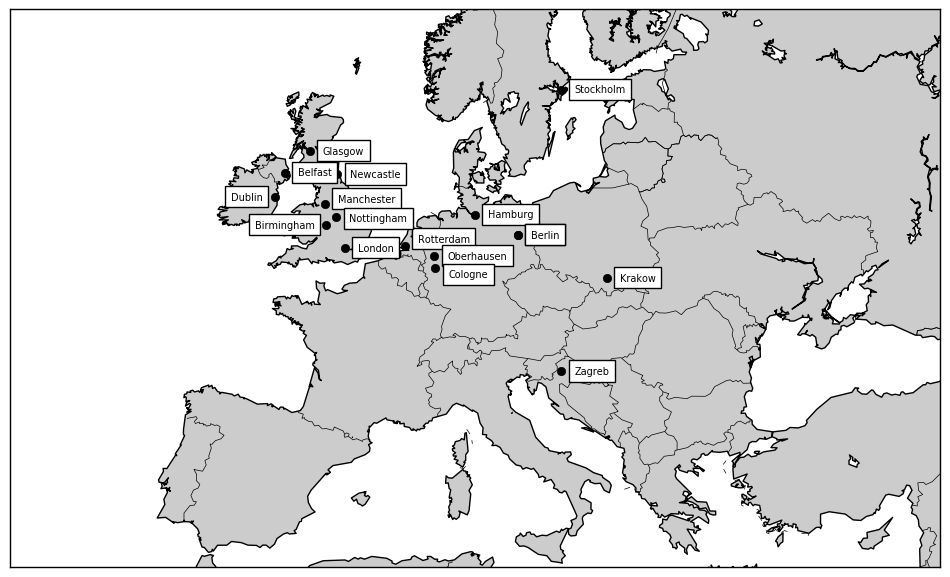

In [48]:
fig = plt.figure(1, figsize=(12, 12))
m = Basemap(width=5e6, height=3e6, resolution='l', projection='lcc', lon_0=10, lat_0=50,)
m.drawstates()
m.drawcoastlines()
m.drawcountries()
m.fillcontinents()

x, y = m(df.x.values, df.y.values)
msk = np.where((x > 0) & (x < 5e6) & (y > 0) & (y < 3e6))
x = x[msk]
y = y[msk]
lcn = df.location.values[msk]
m.plot(x, y, 'ko', markersize=6)
labels = [loc.split(',')[0] for loc in lcn]
for label, xpt, ypt in zip(labels, x, y):
     if (label == 'Birmingham'):
          plt.text(xpt - 380000, ypt - 15000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Cologne'):
          plt.text(xpt + 70000, ypt - 50000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Nottingham'):
          plt.text(xpt + 70000, ypt - 25000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Rotterdam'):
          plt.text(xpt + 70000, ypt + 20000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Manchester'):
          plt.text(xpt + 70000, ypt + 10000, label, fontsize=7, bbox=dict(facecolor='white'))
     elif (label == 'Dublin'):
          plt.text(xpt - 240000, ypt - 15000, label, fontsize=7, bbox=dict(facecolor='white'))
     else:
          plt.text(xpt + 70000, ypt - 15000, label, fontsize=7, bbox=dict(facecolor='white'))
fig.savefig('report/europe_map.pdf', bbox_inches='tight')

### When did certain fighters fight?

(733042.0, 736695.0)

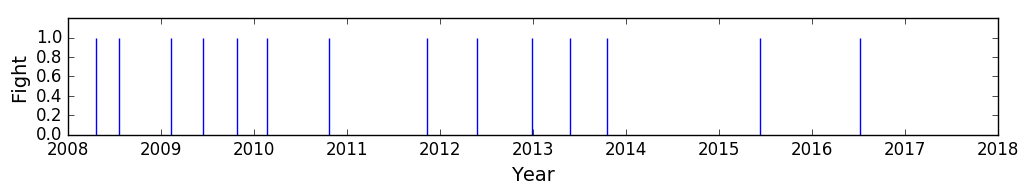

In [34]:
fighter = 'Cain Velasquez'
fig = plt.figure(1, figsize=(12, 1.5))
dates = fights[(fights.Winner == fighter) | (fights.Loser == fighter)].Date
plt.vlines(dates.values, ymin=0, ymax=[1 for _ in range(dates.size)], color='b')
plt.xlabel('Year')
plt.ylabel('Fight')
plt.ylim(0, 1.2)
plt.xlim(np.datetime64('2008-01-01'), np.datetime64('2018-01-01'))

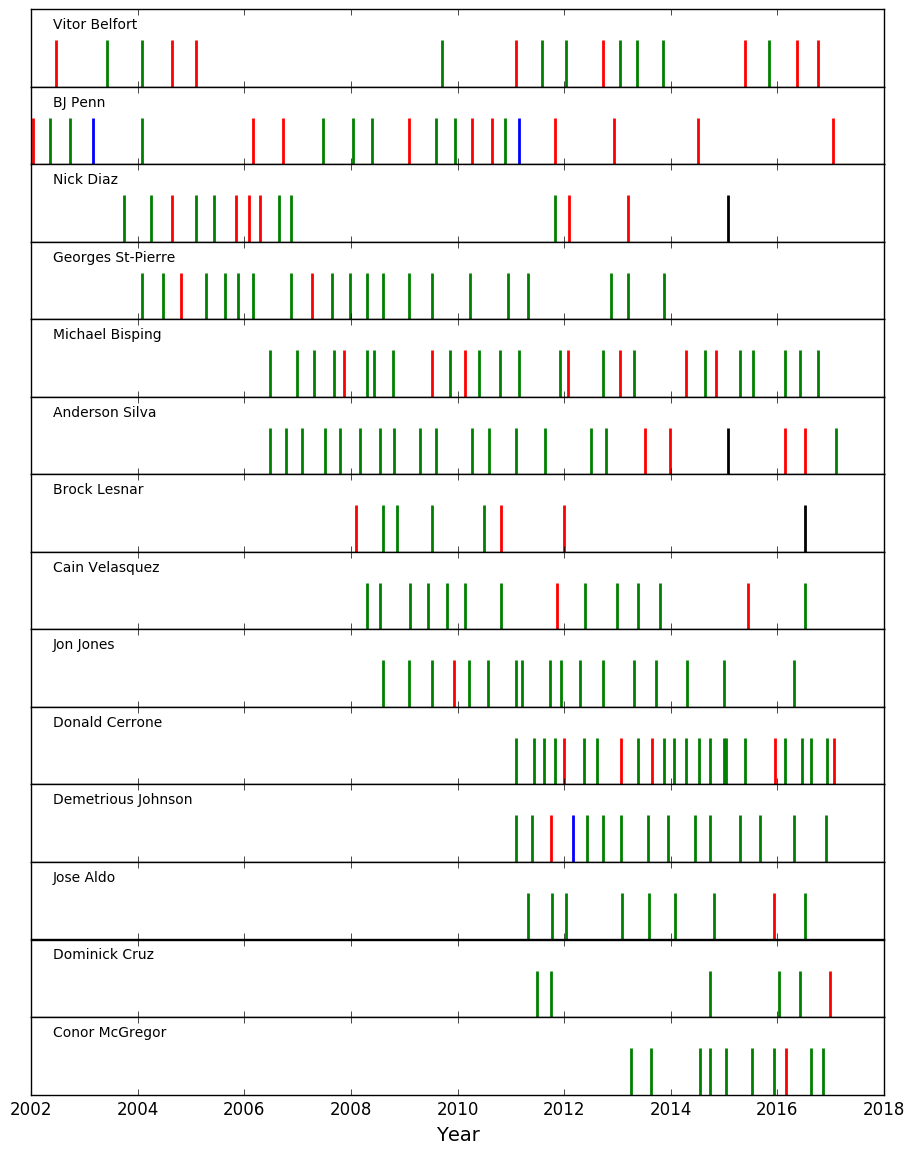

In [35]:
combatants = ['Vitor Belfort', 'BJ Penn','Nick Diaz', 'Georges St-Pierre','Michael Bisping',
              'Anderson Silva', 'Brock Lesnar', 'Cain Velasquez', 'Jon Jones',
              'Donald Cerrone', 'Demetrious Johnson', 'Jose Aldo', 'Dominick Cruz', 'Conor McGregor']
fig, axes = plt.subplots(nrows=len(combatants), ncols=1, figsize=(11, 14))
for i in range(len(combatants)):
     win_dates = fights[(fights.Winner == combatants[i]) & (fights.Outcome == 'def.')].Date
     loss_dates = fights[(fights.Loser == combatants[i]) & (fights.Outcome == 'def.')].Date
     draw_dates = fights[((fights.Winner == combatants[i]) | (fights.Loser == combatants[i])) & (fights.Outcome == 'draw')].Date
     other_dates = fights[((fights.Winner == combatants[i]) | (fights.Loser == combatants[i])) & (fights.Outcome == 'no contest')].Date
     axes[i].vlines(win_dates.values, ymin=0, ymax=[0.6 for _ in range(dates.size)], color='g', lw=2)
     axes[i].vlines(loss_dates.values, ymin=0, ymax=[0.6 for _ in range(dates.size)], color='r', lw=2)
     axes[i].vlines(draw_dates.values, ymin=0, ymax=[0.6 for _ in range(dates.size)], color='b', lw=2)
     axes[i].vlines(other_dates.values, ymin=0, ymax=[0.6 for _ in range(dates.size)], color='k', lw=2)
     axes[i].set_ylim(0, 1)
     axes[i].set_xlim(np.datetime64('2002-01-01'), np.datetime64('2018-01-01'))
     if (i != len(combatants) - 1): axes[i].set_xticklabels([])
     axes[i].set_yticklabels([])
     axes[i].set_yticks([])
     if (i == len(combatants) - 1):
          axes[i].set_xlabel('Year')
     axes[i].text(0.025, 0.75, combatants[i], transform=axes[i].transAxes)
fig.subplots_adjust(hspace=0)
fig.savefig('report/fight_dates_notable_fighters.pdf', bbox_inches='tight')

### Below we form a list of active fighters:

In [36]:
if 1:
     import requests
     from bs4 import BeautifulSoup
     from unidecode import unidecode
     url = 'https://en.wikipedia.org/wiki/List_of_current_UFC_fighters'
     soup = BeautifulSoup(requests.get(url).content, 'lxml')
     tables = soup('table', {'class':'wikitable sortable'})
     assert len(tables) == 11, 'Number of weight classes is not eleven'
     active_fighters = []
     for table in tables:
          for row in table('tr')[2:-1]:
               name = row('td')[1].find('span', {'class':'fn'}).get_text().strip()
               active_fighters.append(unidecode(name))

Our fights database was taken from FightMetric while our list of active fighters was taken from Wikipedia. The two use slightly different names for the fighters for some cases so we need to use fuzzy matching. Note that some fighters have been recently added to the UFC and do not appear in the FightMetric database.

#### How many active fighters are there?

In [37]:
len(active_fighters)

523

#### Which active fighters are not in our database?

In [38]:
active_but_not_found = set(active_fighters) - set(fights.Winner.tolist() + fights.Loser.tolist())
active_but_not_found

{'Abdul-Kerim Edilov',
 'Aiemann Zahabi',
 'Alex Enlund',
 'Andre Soukhamthath',
 'Antonio Rogerio Nogueira',
 'Bilyal Makhov',
 'Carlos Diego Ferreira',
 'Chris De La Rocha',
 'Cindy Dandois',
 'Cris Justino',
 'Cynthia Calvillo',
 'Dan Kelly',
 'Daniel Spitz',
 'Davi Ramos',
 'David Branch',
 'David Grant',
 'Desmond Green',
 'Dmitrii Smolyakov',
 'Dmitriy Sosnovskiy',
 'Dmitry Poberezhets',
 'Doo Ho Choi',
 'Emil Weber Meek',
 'Gavin Tucker',
 'Gina Mazany',
 'Guan Wang',
 'Jarred Brooks',
 'Jim Wallhead',
 'John Phillips',
 'Joseph Duffy',
 'Josh Burkman',
 'Justin Willis',
 'Khalil Rountree',
 'Lucie Pudilova',
 'Magomed Bibulatov',
 'Marco Polo Reyes',
 'Martin Buschkamp',
 'Michel Quinones',
 'Mike De La Torre',
 'Oleksiy Oliynyk',
 'Paulo Henrique Costa',
 'Poliana Botelho',
 'Rafael dos Anjos',
 'Ronaldo Souza',
 'Saparbek Safarov',
 'Tai Tuivasa',
 'Timothy Johnson',
 'Tina Hanninen-Lahdemaki',
 'Tom Duquesnoy',
 'Zabit Magomedsharipov'}

#### Which fighters in the FightMetric database have not been matched?

In [39]:
active_and_found = set(active_fighters) - active_but_not_found
fightmetric_not_matched = set(fights.Winner.tolist() + fights.Loser.tolist()) - active_and_found

#### Add fighters from the FightMetric list if their Wikipedia best match scores 85 or above:

In [40]:
from fuzzywuzzy import process

for fighter in active_but_not_found:
     best_match, score = process.extractOne(query=fighter, choices=fightmetric_not_matched)
     if score > 85: active_and_found.add(best_match)

### Which active fighters started in the UFC the longest ago?

In [41]:
# here we append the two dataframes
fights_of_active = fights[['Winner', 'Loser','Date']]
winners_active_and_found = fights_of_active[fights.Winner.isin(active_and_found)][['Winner', 'Date']]
losers_active_and_found = fights_of_active[fights.Loser.isin(active_and_found)][['Loser', 'Date']]
cmb = winners_active_and_found.append(losers_active_and_found.rename(columns={'Loser':'Winner'}), ignore_index=True)
top25 = cmb.groupby('Winner').Date.min().sort_values()[:26].to_frame().reset_index()
top25

,Winner,Date
0,Vitor Belfort,1997-02-07
1,Andrei Arlovski,2000-11-17
2,Josh Barnett,2000-11-17
3,BJ Penn,2001-05-04
4,Frank Mir,2001-11-02
5,Kelly Dullanty,2002-03-22
6,Robbie Lawler,2002-05-10
7,Georges St-Pierre,2004-01-31
8,Patrick Cote,2004-10-22
9,Diego Sanchez,2005-04-09


In [42]:
total_fights = win_lose.value_counts().to_frame()

In [43]:
fighters_fm = pd.read_csv('data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv', header=0, parse_dates=['Dob'])
top25 = top25.merge(fighters_fm, left_on='Winner', right_on='Name', how='left')[['Name', 'Date', 'Dob']]
top25['Age Then'] = (top25.Date - top25.Dob) / np.timedelta64(1, 'Y')
top25['Age Now'] = (pd.to_datetime('today') - top25.Dob) / np.timedelta64(1, 'Y')
top25['Age Then'] = top25['Age Then'].apply(lambda x: round(x, 1))
top25['Age Now'] = top25['Age Now'].apply(lambda x: round(x, 1))
top25 = top25[top25.Name != 'Kelly Dullanty']
top25 = top25.merge(total_fights, left_on='Name', right_index=True, how='left')
top25.index = range(1, 26)
top25.columns = ['Name', '1st UFC Fight', 'Dob', 'Age Then', 'Age Now', 'UFC Fights']
top25

,Name,1st UFC Fight,Dob,Age Then,Age Now,UFC Fights
1,Vitor Belfort,1997-02-07,1977-04-01,19.9,39.9,23
2,Andrei Arlovski,2000-11-17,1979-02-04,21.8,38.1,22
3,Josh Barnett,2000-11-17,1977-11-10,23.0,39.3,10
4,BJ Penn,2001-05-04,1978-12-13,22.4,38.2,24
5,Frank Mir,2001-11-02,1979-05-24,22.4,37.8,27
6,Robbie Lawler,2002-05-10,1982-03-20,20.1,35.0,17
7,Georges St-Pierre,2004-01-31,1981-05-19,22.7,35.8,21
8,Patrick Cote,2004-10-22,1980-02-29,24.6,37.0,20
9,Diego Sanchez,2005-04-09,1981-12-31,23.3,35.2,25
10,Nate Marquardt,2005-08-06,1979-04-20,26.3,37.9,23


In [44]:
top25[['Name', '1st UFC Fight', 'Age Then', 'Age Now', 'UFC Fights']].reset_index().to_latex('report/longest_ufc_tensure_RAW.tex', index=False)

We see that Kelly Dullanty appears on the list because of the failings of fuzzy matching. It was probably Dan Kelly that gave the false positive.